<a href="https://colab.research.google.com/github/bereml/iap/blob/master/libretas/1c_reglin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cisneros Aguilar Sara Kenia

# Ejercicio 1

Un perceptrón o neurona no es capaz de aproximar una función que separe en dos clases (naranja y azul) el conjunto de datos mostrado en la figura 1. Propón una transformación aplicada a los atributos $x_1$ y $x_2$ de forma que puedan ser separados por solo un perceptrón.
Justifica porque la transformación propuesta funciona. (2 puntos.)

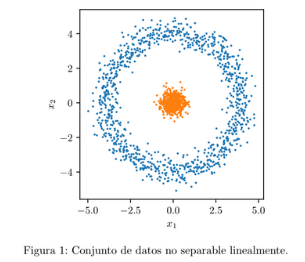

Ya que tenemos dos círculos de distinto tamaño lo primero que podemos considerar es un umbral para dividir los dos conjuntos, por ejemplo si el radio del primer círculo es 1, y el del segundo 4, se considera la distancia que hay hasta el centro y nuestro umbral podría ser tres, entonces aquellos puntos que pertenecen al círculo con radio menor a tres les damos el valor de 1, de lo contrario el de 0 y tenemos dos conjuntos perfectamente separables.

La solución anterior implica que debemos aproximar algun umbral pues no siempre vamos a saber cual elegir, una solución más general es transformar nuestros datos a un espacio de coordenadas polares:

$$r = \sqrt{x_1^2 + x_2^2}$$

$$\theta = arctg(\frac{x_2}{x_1})$$

en donde la $r$ denota al radio y no importará la cantidad de círculos ni su tamaño, tendremos conjuntos separables linealmente.

# Ejercicio 2. Regresión lineal
Extiende el ejercicio 1c_reglin.ipynb visto en clase para realizar regresión lineal con los dos atributos de entrada1. (2 puntos.)


## 1. Preparación


In [ ]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import torch

In [ ]:
URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)

In [ ]:
# Descargamos los datos
! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

--2021-03-19 22:12:12--  https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666 [text/plain]
Saving to: ‘../datos/califs.csv’

../datos/califs.csv 100%[===================>]     666  --.-KB/s    in 0s      

2021-03-19 22:12:12 (28.9 MB/s) - ‘../datos/califs.csv’ saved [666/666]



In [ ]:
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


## 2. Hipótesis

Recordemos que dado un conjunto de ejemplos con atributos $X_1, X_2$, donde $X_i = (x_1^i, \dots, x_d^i)$, $i = 1, 2$ y salidas $y$, la hipótesis de regresión lineal está dada por:

$$\hat{Y} = b + w_1 X_1 + w_2 X_2$$

donde $w_i$ y $b$ son pesos y sesgo (parámetros) del modelo y $\hat{Y}$ la salida predicha. 

## 3. Definimos los atributos
Obtengamos el atributo y la salida:

In [ ]:
# número de horas de estudio y nota anterior, ya que todo esta vectorizado solo es necesario introducir los otros datos al definir x
x = torch.tensor(df.iloc[:, [0,1]].values) 
x = x.view(-1, 2).type(torch.float32)
y_true = torch.tensor(df.iloc[:, 2].values) # salida
y_true = y_true.view(-1, 1).type(torch.float32)

In [ ]:
print(y_true.shape)

torch.Size([50, 1])


Grafiquemos para tener una idea de la distribución de los datos:

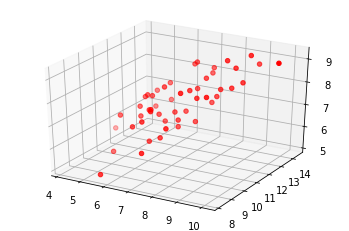

In [ ]:
# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x.T[0].numpy(), x.T[1].numpy(), y_true.view(-1).numpy(), c ='r', marker='o')
#ax1.get_xlabel('horas de estudio')
#ax1.get_ylabel('calificación anterior')
#ax1.get_zlabel('calificación')
plt.show()

In [ ]:
m, d = x.shape
m, d

(50, 2)

## 4. Entrenamiento

Ahora implementemos todo en una función:

In [ ]:
def train(x, y_true, alpha=0.01, steps=10):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

Entrenamos el modelo considerando $\alpha = 0.01$ y 30 epocas:

w: tensor([[0.2248],
        [0.4108]])
b: tensor([0.0329])


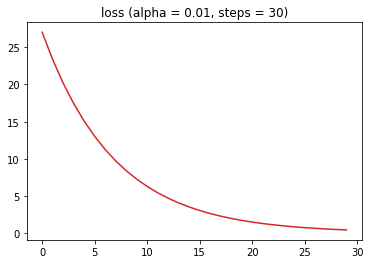

In [ ]:
a = 0.01
s = 30
w, b, loss_hist = train(x, y_true,alpha = a, steps = s)
print('w:',w)
print('b:',b)
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.title(f'loss (alpha = {a}, steps = {s})')
plt.show()

Entrenamos el modelo considerando $\alpha = 0.02$ y 30 epocas:

w: tensor([[-1.2555e+13],
        [-2.2253e+13]])
b: tensor([-1.8335e+12])


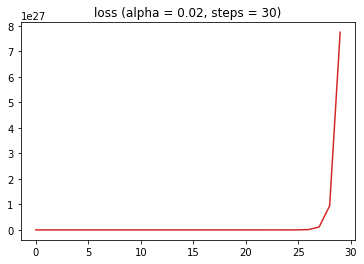

In [ ]:
a = 0.02
s = 30
w, b, loss_hist = train(x, y_true,alpha = a, steps = s)
print('w:',w)
print('b:',b)
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.title(f'loss (alpha = {a}, steps = {s})')
plt.show()

Entrenamos el modelo considerando $\alpha = 0.002$ y 10 epocas:

w: tensor([[0.2565],
        [0.4556]])
b: tensor([0.0375])


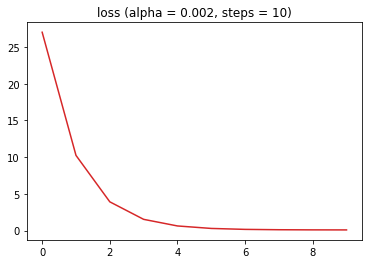

In [ ]:
a = 0.002
s = 10
w, b, loss_hist = train(x, y_true,alpha = a, steps = s)
print('w:',w)
print('b:',b)
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.title(f'loss (alpha = {a}, steps = {s})')
plt.show()

Como podemos ver en las gráficas anteriores, una tasa de aprendizaje muy grande (0.02) no da buenos resultados independientemente de la cantidad de epocas consideradas.

Además, la cantidad de epocas necesarias dependen de la tasa de aprendizaje, por ejemplo con la tasa de 0.01 se requirieron 30 epocas, mientras que para una tasa más pequeña se requieren 6.